In [1]:
import numpy as np 
import pandas as pd    
import matplotlib.pyplot as plt

from fcmeans import FCM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings         
warnings.filterwarnings("ignore")


In [2]:
dfe = pd.read_csv("dataset/resampled-train.csv")

In [3]:

X_resampled = dfe[['ODO', 'Year', 'Age', 'Mileage', 'Engine', 'Power', 'Seats', 'Fuel_Diesel', 'Fuel_Petrol', 'Transmission_Automatic', 'Transmission_Manual', 'Owner_First', 'Owner_Fourth & Above', 'Owner_Second', 'Owner_Third']]

y_resampled = dfe['Price_Category']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [5]:
# Fuzzy C-means Clustering
fcm = FCM(n_clusters=3)
fcm.fit(X_train_scaled)
fuzzy_labels_train = fcm.predict(X_train_scaled)
fuzzy_labels_test = fcm.predict(X_test_scaled)

clusters_train = fuzzy_labels_train

knn = KNeighborsClassifier()
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, clusters_train)
best_params = grid_search.best_params_

best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, fuzzy_labels_train)

knn_clusters_test = best_knn.predict(X_test_scaled)

conf_matrix_test = confusion_matrix(fuzzy_labels_test, knn_clusters_test)
classification_rep_test = classification_report(fuzzy_labels_test, knn_clusters_test)
accuracy_test = accuracy_score(fuzzy_labels_test, knn_clusters_test)

print("Test Set Metrics:")
print("Confusion Matrix:")
print(conf_matrix_test)
print("\nClassification Report:")
print(classification_rep_test)
print("\nAccuracy:", accuracy_test)


Test Set Metrics:
Confusion Matrix:
[[ 881    1    0]
 [   3 1695    0]
 [   3    0  858]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       882
           1       1.00      1.00      1.00      1698
           2       1.00      1.00      1.00       861

    accuracy                           1.00      3441
   macro avg       1.00      1.00      1.00      3441
weighted avg       1.00      1.00      1.00      3441


Accuracy: 0.997965707643127


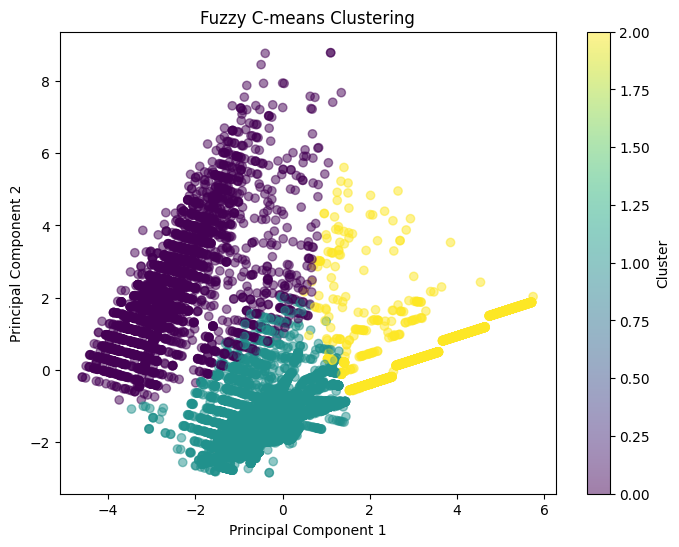

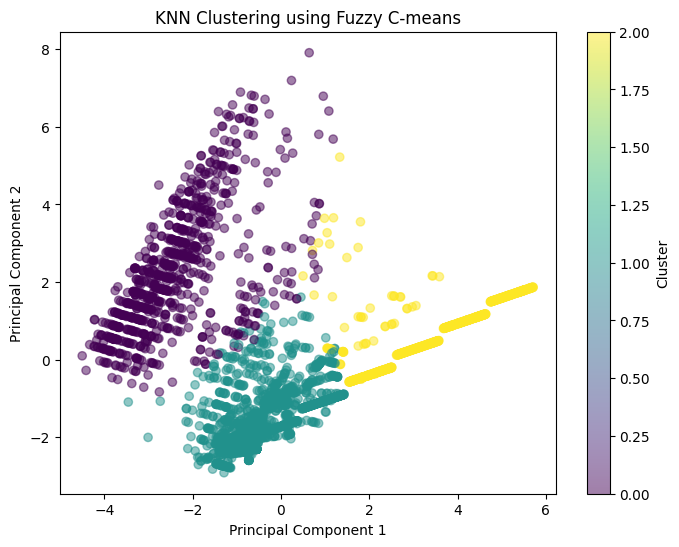

In [6]:
# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=fuzzy_labels_train, cmap='viridis', alpha=0.5)
plt.title('Fuzzy C-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(**best_params)
knn_pca.fit(X_train_pca, fuzzy_labels_train)

knn_clusters_test_pca = knn_pca.predict(X_test_pca)

plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=knn_clusters_test_pca, cmap='viridis', alpha=0.5)
plt.title('KNN Clustering using Fuzzy C-means')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()
